# 100 Visualisations

In [95]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys 

sys.path.append('c:/Users/Jordi Cremades/Documents/Repos/central-node')

from utils import query_engines

palette = sns.color_palette()
blue = palette[0]
orange = palette[1]
green = palette[2]
red = palette[3]
purple = palette[4]
brown = palette[5]
pink = palette[6]
gray = palette[7]
olive = palette[8]
cyan = palette[9]

# 1 - QC share velocity

My assumption is that the weight of verticals is shifting. Glovo started as a restaurant-focused app, but with time, other options are gaining more weight. The share from QC is growing year after year, and it seam that it is doing so at a steady pace. In this section I want to answer the following question:

- Has the velocity of QC share increased in GMV? 2020 was the year with the highest increment YoY on the share for Glovo. The subsequent year 2021 it decreased, but since then the share of Groceries has been constantly growing. In 2024 it is growing at a lower pace than the previous 2023 year.

In [56]:
q = query_engines.QueryEngines(reset_query_logs=True, reset_to_load=False)

QUERY_FILE = '1/orders.sql'
OUTPUT_FILE = '1_orders'
LOAD_FROM_OUTPUT_FILE = '1_orders'
PRINT_QUERY = True

START_DATE = "'2015-01-01'"
END_DATE = "'2025-01-01'"

params = [
    # dates
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
]

q.prepare_query(QUERY_FILE, params=params)

df  = q.query_run_starburst( #query_run_livedb otherwise
    output_file=OUTPUT_FILE,
    load_from_output_file=LOAD_FROM_OUTPUT_FILE,
    print_query=PRINT_QUERY
)

df.head()

,year,vertical,gmv
0,2023,LaaS,2.353147e+03
1,2024,Food,2.099414e+09
2,2017,LaaS,0.000000e+00
3,2020,LaaS,5.132461e+03
4,2024,QCommerce,4.684233e+08


In [57]:
df['vertical'].unique()

array(['LaaS', 'Food', 'QCommerce'], dtype=object)

In [69]:
# Group by 'year' and calculate the sum of 'gmv' for each year
total_gmv_per_year = df.groupby('year')['gmv'].sum().reset_index()
total_gmv_per_year.columns = ['year', 'total_gmv']

# Merge the total gmv per year with the original dataframe
df_merged = pd.merge(df, total_gmv_per_year, on='year')
df_merged.sort_values(by='year', inplace=True)

# Calculate the share of each vertical per year in percentage
df_merged['share'] = (df_merged['gmv'] / df_merged['total_gmv']) * 100

# Calculate year-to-year increment in share
df_merged['share_increment'] = df_merged.groupby('vertical')['share'].diff()

df_merged.head()

,year,vertical,gmv,total_gmv,share,share_increment
21,2015,QCommerce,146851.65,146851.65,100.000000,NaN
22,2015,LaaS,0.00,146851.65,0.000000,NaN
14,2016,QCommerce,2132743.75,5502809.09,38.757364,-61.242636
13,2016,Food,3370065.34,5502809.09,61.242636,NaN
12,2016,LaaS,0.00,5502809.09,0.000000,0.000000


In [83]:
df_viz

,year,vertical,gmv,total_gmv,share,share_increment
23,2019,QCommerce,7.541629e+07,6.502384e+08,11.598252,0.567138
10,2020,QCommerce,1.986320e+08,1.280243e+09,15.515182,3.916930
28,2021,QCommerce,2.734910e+08,2.062535e+09,13.259949,-2.255233
20,2022,QCommerce,4.364658e+08,3.097273e+09,14.091939,0.831990
2,2023,QCommerce,6.572900e+08,3.943413e+09,16.668048,2.576109
4,2024,QCommerce,4.684233e+08,2.567850e+09,18.241850,1.573802


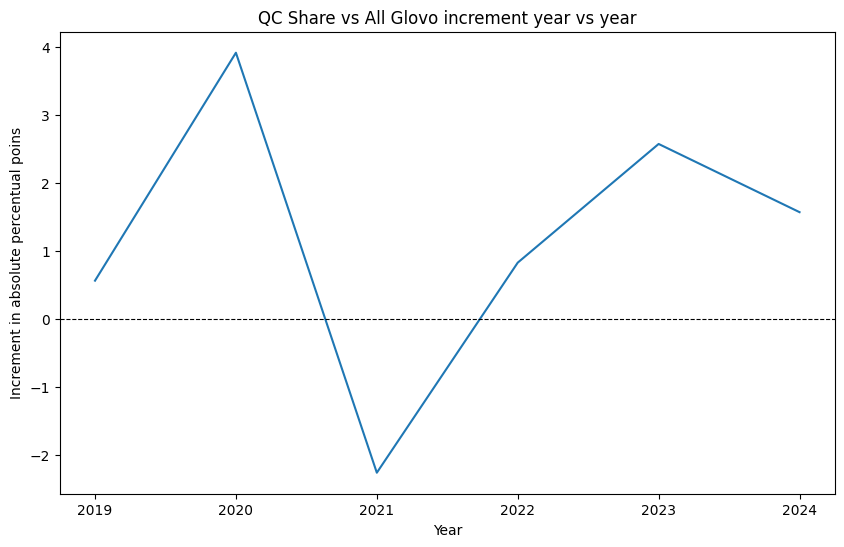

In [96]:
# plot
COND = 'Groceries'

df_viz = df_merged[df_merged['vertical'] == 'QCommerce'].sort_values(by='year')
df_viz = df_viz[df_viz['year'] > 2018]

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df_viz['year'], df_viz['share_increment'], color=blue)

ax.set(xlabel='Year', 
       ylabel='Increment in absolute percentual poins',
       title='QC Share vs All Glovo increment year vs year')

ax.axhline(y=0, color='black', linestyle='--', linewidth=0.8, label='y=0')

ax.grid(False)

plt.show()